In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

### Упражнение 1

* Скачайте с портала Открытых Данных производственный календарь России: https://data.gov.ru/opendata/7708660670-proizvcalendar
* На его основе определите соответствующий календарь в Pandas: `RussianBusinessCalendar(AbstractHolidayCalendar)`
* С помощью полученного в пункте выше календаря и модуля `pd.offsets` создайте DataFrame one-hot календарных признаков:
    * День недели
    * Месяц
    * Выходной день
    * Праздничный день
    * Предпраздничный рабочий день
    * Последний день месяца
    * Последний рабочий день месяца
    * Предновогодний выходной день

In [2]:
# пример требуемого DataFrame 
# events

### Решение

Сам подход к решению, честно признаюсь, взял с видеолекции. Однако определил только праздничные, выходные и дни недели.
В целом понимаю, что в той теме у меня остались пробелы по вопросу использования функции shift в том числе с учетом своего календаря. Буду ждать пояснений при разборе домашек.

In [2]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, EasterMonday
from pandas.tseries.offsets import DateOffset, Day, CustomBusinessDay

In [3]:
caldr = pd.read_csv('open_calendar.csv')
caldr.head()

,Год/Месяц,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Всего рабочих дней,Всего праздничных и выходных дней,Количество рабочих часов при 40-часовой рабочей неделе,Количество рабочих часов при 36-часовой рабочей неделе,Количество рабочих часов при 24-часовой рабочей неделе
0,1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,114,2004,1807.2,1204.8
1,2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31",250,116,1995,1800.0,1200.0
2,2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30",251,114,2001,1807.2,1204.8
3,2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*",250,115,1992,1792.0,1192.0
4,2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*",250,115,1992,1792.0,1192.0


In [4]:
holidays = list()

for i in range(caldr.shape[0]):
    row = caldr.iloc[i]
    
    yy = int(caldr.iloc[i]["Год/Месяц"])
    for mm_i, mm_name in enumerate(caldr.columns[1:13]):
        mm = mm_i + 1
        for day in row[mm_name].split(','):
            if day[-1] != '*':
                if day[-1] == '+':
                    day = day[:-1]
                day = int(day)
                holidays.append(datetime.datetime(yy, mm, day))
                


In [5]:
df_holidays = pd.DataFrame(holidays, columns=['праздники'])
df_holidays.index = pd.to_datetime(holidays)
df_holidays = df_holidays.sort_index()
df_holidays.to_csv('holidays.csv', index=False)

In [6]:
df_holidays.head()

,праздники
1999-01-01,1999-01-01
1999-01-02,1999-01-02
1999-01-03,1999-01-03
1999-01-04,1999-01-04
1999-01-07,1999-01-07


In [7]:
class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(2014, 1, 1)
    end_date = datetime.datetime(2014, 12, 31)
    rules = [
            Holiday('праздник', year = d.year, month = d.month, day = d.day) \
              for d in pd.to_datetime(df_holidays["праздники"])
            ]

In [8]:
russian_busday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri', calendar=RussianBusinessCalendar())

In [9]:
events = pd.DataFrame(index=pd.date_range('2014-01-01', '2019-12-31'))
events = pd.merge(events, df_holidays, how='left', left_index=True, right_index=True)
events = events.fillna('рабочий')
events.head()

,праздники
2014-01-01,2014-01-01 00:00:00
2014-01-02,2014-01-02 00:00:00
2014-01-03,2014-01-03 00:00:00
2014-01-04,2014-01-04 00:00:00
2014-01-05,2014-01-05 00:00:00


In [10]:
events.loc[events['праздники'] != 'рабочий', 'праздники'] = 1
events.loc[events['праздники'] == 'рабочий', 'праздники'] = 0
events.head()

,праздники
2014-01-01,1
2014-01-02,1
2014-01-03,1
2014-01-04,1
2014-01-05,1


In [11]:
events['праздник'] = [0 for _ in range(events.shape[0])]
events.loc[(events.index.day.isin([1,2,3,4,5,6,7,8])) & (events.index.month == 1), 'праздник'] = 1
events.loc[(events.index.day == 23) & (events.index.month == 2), 'праздник'] = 1
events.loc[(events.index.day == 8) & (events.index.month == 3), 'праздник'] = 1
events.loc[(events.index.day == 1) & (events.index.month == 5), 'праздник'] = 1
events.loc[(events.index.day == 9) & (events.index.month == 5), 'праздник'] = 1
events.loc[(events.index.day == 12) & (events.index.month == 6), 'праздник'] = 1
events.loc[(events.index.day == 4) & (events.index.month == 11), 'праздник'] = 1

In [12]:
holidays = events[events["праздник"] == 1].index
idx = [datetime.datetime(d.year, d.month, d.day) + pd.Timedelta(days=1) - russian_busday for d in holidays]
events["пердпразничный"] = [0 for _ in range(events.shape[0])]
events.loc[events.index.isin(idx), "пердпразничный"] = 1

In [13]:
for i, day_week in enumerate(['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']):
    events[day_week] = [i if day == i else 0 for day in events.index.weekday]

In [14]:
events[events["пердпразничный"] == 1].head()

,праздники,праздник,пердпразничный,пн,вт,ср,чт,пт,сб,вс
2014-02-21,0,0,1,0,0,0,0,4,0,0
2014-03-07,0,0,1,0,0,0,0,4,0,0
2014-04-30,0,0,1,0,0,2,0,0,0,0
2014-05-08,0,0,1,0,0,0,3,0,0,0
2014-06-11,0,0,1,0,0,2,0,0,0,0


### Упражнение 2

* Для временного ряда курса акций Сбербанка на основе производственного календаря России сформируйте DataFrame признаков:
    * Лаговые переменные рабочих дней с глубинами: 1, 3, 5
    * Скользящие статистики `['mean', 'median', 'max', 'min', 'std'] ` с окнами 1, 3, 5 сгрупированные по дням недели
    * Статистики `['mean', 'median', 'max', 'min', 'std'] ` в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

### Решение

In [41]:
stocks = pd.read_csv('sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], index_col='TRADEDATE', parse_dates=True)
stocks.tail()

,CLOSE
TRADEDATE,
2020-01-03,255.00
2020-01-06,253.90
2020-01-08,259.15
2020-01-09,257.99
2020-01-10,258.19


#### п.1

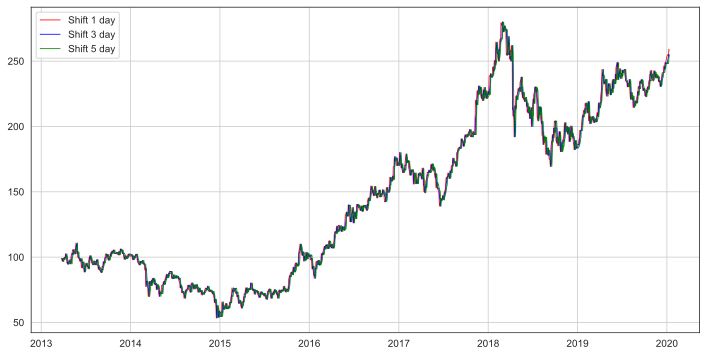

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(stocks.shift(1).fillna(method='bfill'), "r", linewidth=0.8, label="Shift 1 day")
plt.plot(stocks.shift(3).fillna(method='bfill'), "b", linewidth=0.8, label="Shift 3 day")
plt.plot(stocks.shift(5).fillna(method='bfill'), "g", linewidth=0.8, label="Shift 5 day")
plt.legend(prop={'size':10})
plt.grid(True)
plt.show()

#### п.2

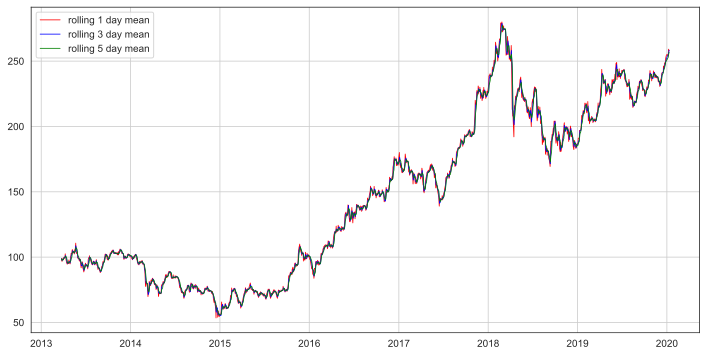

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(stocks.rolling(window=1, min_periods=1).mean(), "r", linewidth=0.8, label="rolling 1 day mean")
plt.plot(stocks.rolling(window=3, min_periods=1).mean(), "b", linewidth=0.8, label="rolling 3 day mean")
plt.plot(stocks.rolling(window=5, min_periods=1).mean(), "g", linewidth=0.8, label="rolling 5 day mean")
plt.legend(prop={'size':10})
plt.grid(True)
plt.show()

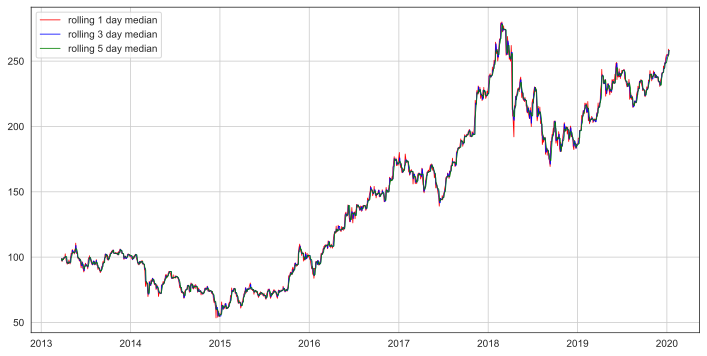

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(stocks.rolling(window=1, min_periods=1).median(), "r", linewidth=0.8, label="rolling 1 day median")
plt.plot(stocks.rolling(window=3, min_periods=1).median(), "b", linewidth=0.8, label="rolling 3 day median")
plt.plot(stocks.rolling(window=5, min_periods=1).median(), "g", linewidth=0.8, label="rolling 5 day median")
plt.legend(prop={'size':10})
plt.grid(True)
plt.show()

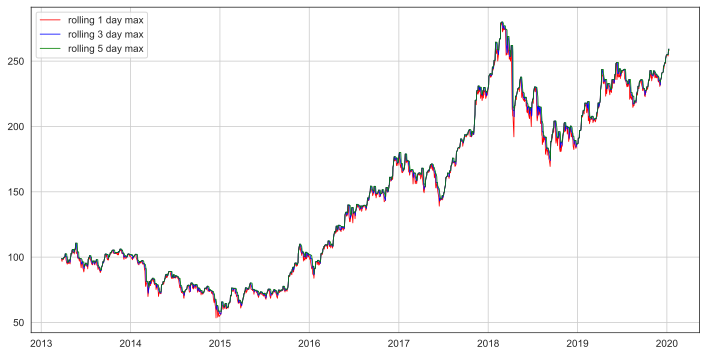

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(stocks.rolling(window=1, min_periods=1).max(), "r", linewidth=0.8, label="rolling 1 day max")
plt.plot(stocks.rolling(window=3, min_periods=1).max(), "b", linewidth=0.8, label="rolling 3 day max")
plt.plot(stocks.rolling(window=5, min_periods=1).max(), "g", linewidth=0.8, label="rolling 5 day max")
plt.legend(prop={'size':10})
plt.grid(True)
plt.show()

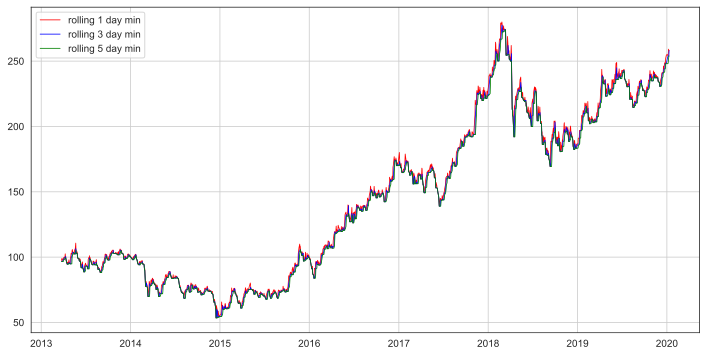

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(stocks.rolling(window=1).min().fillna(method='bfill'), "r", linewidth=0.8, label="rolling 1 day min")
plt.plot(stocks.rolling(window=3).min().fillna(method='bfill'), "b", linewidth=0.8, label="rolling 3 day min")
plt.plot(stocks.rolling(window=5).min().fillna(method='bfill'), "g", linewidth=0.8, label="rolling 5 day min")
plt.legend(prop={'size':10})
plt.grid(True)
plt.show()

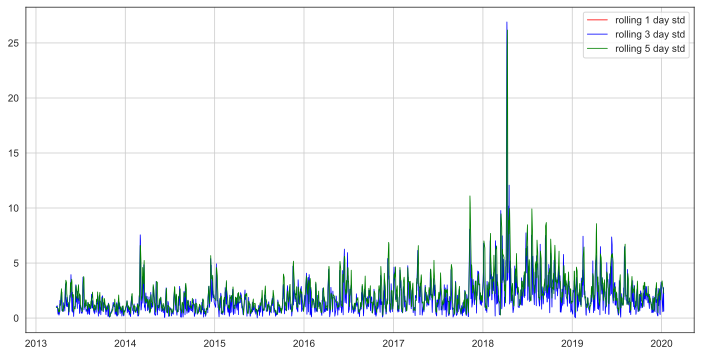

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(stocks.rolling(window=1).std().fillna(method='bfill'), "r", linewidth=0.8, label="rolling 1 day std")
plt.plot(stocks.rolling(window=3).std().fillna(method='bfill'), "b", linewidth=0.8, label="rolling 3 day std")
plt.plot(stocks.rolling(window=5).std().fillna(method='bfill'), "g", linewidth=0.8, label="rolling 5 day std")
plt.legend(prop={'size':10})
plt.grid(True)
plt.show()

#### п.3  Комментарий: не совсем понял, как формировать статистики с группировкой по рабочим и выходным дням

In [49]:
stocks.asfreq('1D').fillna(method='ffill').shift(5, freq=russian_busday).head(10)

,CLOSE
TRADEDATE,
2013-04-01,98.79
2013-04-02,97.20
2013-04-03,96.75
2013-04-04,98.59
2013-04-05,98.76
2013-04-05,98.76
2013-04-05,98.76
2013-04-08,98.07
2013-04-09,98.93
